In [ ]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)



In [ ]:
# Imports
import numpy as np
import os
import cv2
import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

2025-05-20 12:46:16.235017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747745176.465502      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747745176.539794      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Laoding data
train_dir = '/kaggle/input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'

def load_data(data_dir, img_size=(60, 60)):
    images = []
    labels = []
    classes = os.listdir(data_dir)
    for label in tqdm.tqdm(classes):
        path = os.path.join(data_dir, label)
        for img_file in os.listdir(path):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

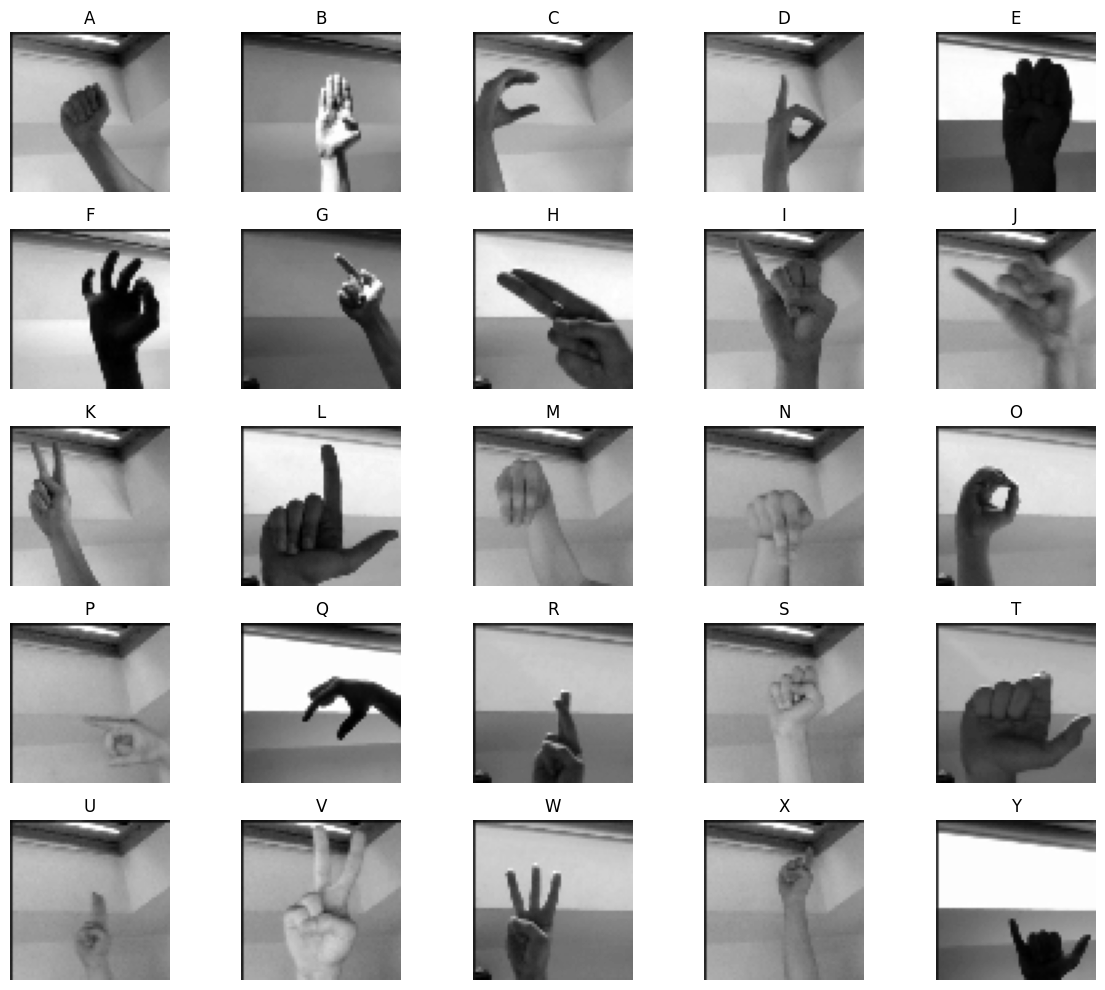

In [4]:
# Display sample images
def display_sample_data(data_dir, img_size=(60, 60)):
    plt.figure(figsize=(12, 10))
    for i, label in enumerate(sorted(os.listdir(data_dir))[:25]):
        path = os.path.join(data_dir, label)
        img_file = os.listdir(path)[0]
        img = cv2.imread(os.path.join(path, img_file), cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        plt.subplot(5, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_sample_data(train_dir)

In [5]:
# Load and preprocess training data
X, y = load_data(train_dir, img_size=(60, 60))
X, y = shuffle(X, y, random_state=42)
X = X.astype('float32') / 255.0
X = X.reshape(-1, 60, 60, 1)

100%|██████████| 29/29 [09:26<00:00, 19.55s/it]


In [6]:
# Encode labels
classes = sorted(os.listdir(train_dir))
label_map = {cls: idx for idx, cls in enumerate(classes)}
y = np.array([label_map[label] for label in y])
y = to_categorical(y, num_classes=29)

In [ ]:
# Model building
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(60, 60, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.15),
    Dense(64, activation='relu'),
    Dense(29, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

history = model.fit(
    X, y,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[checkpoint]
)

Epoch 1/10


I0000 00:00:1747745821.100139     103 service.cc:148] XLA service 0x7bf238006eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747745821.100952     103 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747745821.100969     103 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747745821.515086     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


  13/1088 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.0506 - loss: 3.3680

I0000 00:00:1747745825.622263     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2820 - loss: 2.4126
Epoch 1: val_accuracy improved from -inf to 0.82126, saving model to best_model.h5
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.2821 - loss: 2.4118 - val_accuracy: 0.8213 - val_loss: 0.5356
Epoch 2/10
1085/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8031 - loss: 0.5689
Epoch 2: val_accuracy improved from 0.82126 to 0.94287, saving model to best_model.h5
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8033 - loss: 0.5686 - val_accuracy: 0.9429 - val_loss: 0.1839
Epoch 3/10
1085/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9016 - loss: 0.2833
Epoch 3: val_accuracy improved from 0.94287 to 0.96759, saving model to best_model.h5
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.9016 - loss: 0.2832 - val_accuracy: 0.9676 - val_loss: 0.1038
Epoch 4/10
1085/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9359 - loss: 0.1886
Epoch 4: val_accuracy improved from 0

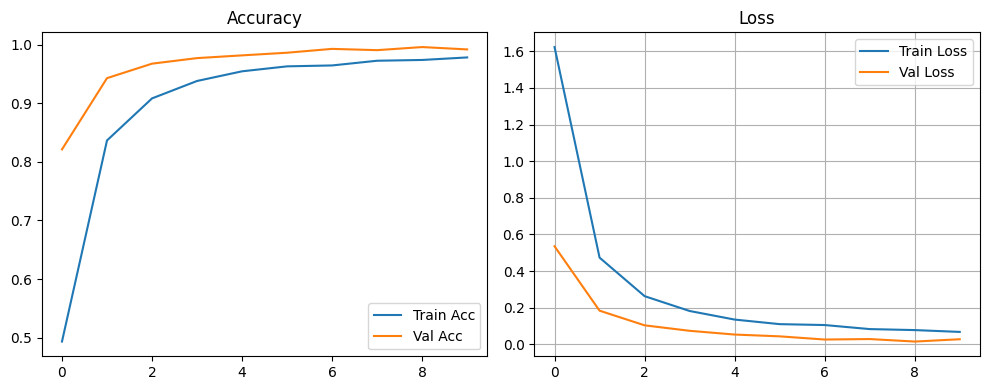

In [ ]:
# Plotting graph
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.tight_layout()
plt.grid(True)
plt.show()